In [12]:
import pickle as pkl
import numpy as np

from src.models.train_emos import train_emos, train_and_test_emos
from src.visualization.pit import make_cpit_diagram_emos, make_cpit_hist_emos 
from src.visualization.brier_score import brier_skill_plot, brier_plot
from src.models.get_data import get_tensors, get_normalized_tensor
from src.models.emos import EMOS
from src.visualization.scoring_tables import make_table
from src.visualization.twcrpss_plot import make_twcrpss_plot
from src.models.emos import EMOS
from src.visualization.reliability_diagram import make_reliability_diagram
from src.training.training import load_model

In [5]:
folder = '/net/pc200239/nobackup/users/hakvoort/models/emos/'

tn_16_5 = load_model(folder + 'trunc_normal/tn_twcrps_mean16.0_std5.0.pkl')

gev_16_5 = load_model(folder + 'gev/gev_twcrps_mean16.0_std5.0.pkl')

frechet_16_5 = load_model(folder + 'frechet/frechet_twcrps_mean16.0_std5.0.pkl')

models = {'tn_12_4': tn_16_5, 'gev_12_4': gev_16_5, 'frechet_12_4': frechet_16_5}

base_model = models.pop('tn_12_4')

Using given parameters for Truncated Normal distribution
Using given parameters for Generalized Extreme Value distribution
Using given parameters for Frechet distribution


In [6]:
test_fold = 3
ignore = ['229', '285', '323']
X_test, y_test, variances_test = get_tensors(base_model.neighbourhood_size, base_model.feature_names, test_fold, ignore)
X_test = (X_test - base_model.feature_mean) / base_model.feature_std

print(X_test.shape)

(7780, 5)


In [7]:
samples = 2000

print('Base model CRPS: ', base_model.loss_CRPS_sample_general(X_test, y_test, variances_test, samples).numpy())
for model, m in models.items():
    print(model, 'CRPS: ', m.loss_CRPS_sample_general(X_test, y_test, variances_test, samples).numpy())

Base model CRPS:  0.9004036
gev_12_4 CRPS:  0.9053951
frechet_12_4 CRPS:  0.90995693


There are 848 values in the PIT diagram


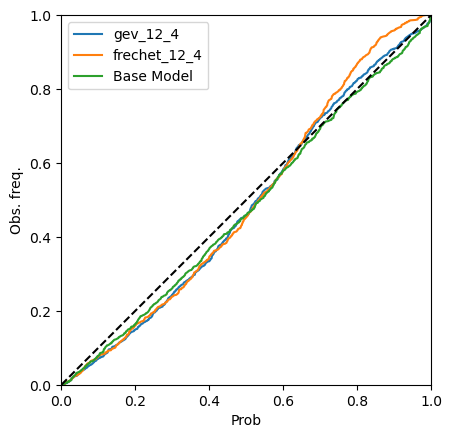

In [9]:
t = 10
make_cpit_diagram_emos(models, X_test, y_test, variances_test, t=t, base_model=base_model)

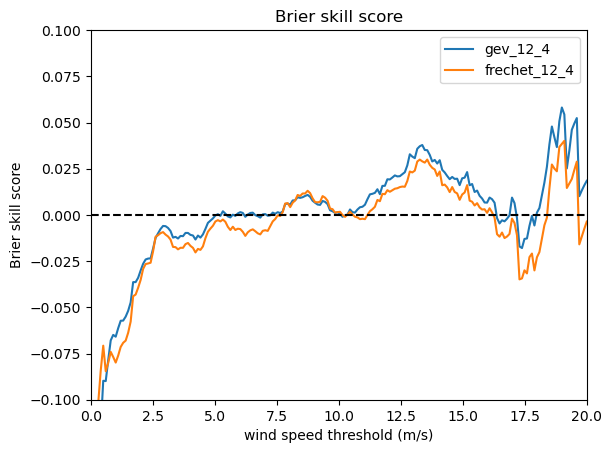

In [10]:
x_values = np.linspace(0, 20, 200)
ylim=[-0.1,0.1]
brier_skill_plot(base_model, models, X_test, y_test, variances_test, x_values, ylim=ylim)

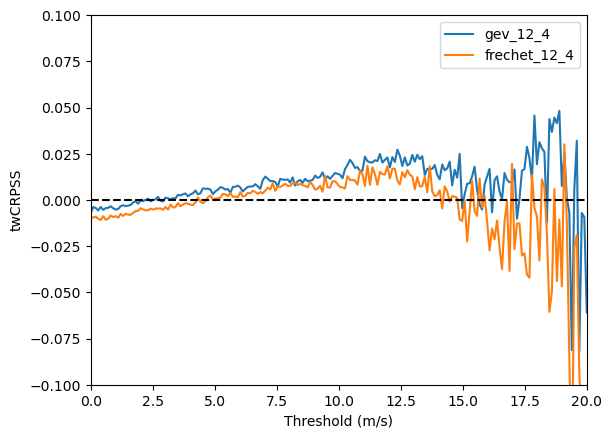

In [11]:
make_twcrpss_plot(base_model, models, X_test, y_test, variances_test, x_values, ylim=ylim)

In [ ]:
t=15
make_reliability_diagram(models, X_test, y_test, variances_test, t=t, base_model=base_model)